## EDA New York Times

In [50]:
import pandas as pd
df = pd.read_csv('./nyt-frame.csv', header = 0)
data = df.iloc[:,9:]
array = data.values
array.shape

(102, 4424)

In [51]:
df.head(2)

,Unnamed: 0,class.labels,X.,X.d,X.nd,X.s,X.th,X.this,a,abandoned,...,yorkers,yorks,you,young,younger,your,youre,youth,youthful,yu
0,1,art,0.008707,0.0,0.0,0.0,0.009251,0.0,0.007564,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,art,0.005848,0.0,0.0,0.0,0.000000,0.0,0.001418,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
labels = df.iloc[:, 1]
labels

0        art
1        art
2        art
3        art
4        art
       ...  
97     music
98     music
99     music
100    music
101    music
Name: class.labels, Length: 102, dtype: object

In [53]:
import numpy as np
header = list(df.columns.values[9:])
sample_word = np.random.choice(header, 20, replace=False)
print(sample_word)

['quite' 'choruses' 'ride' 'snakes' 'fragmentation' 'playing' 'succeeded'
 'architects' 'need' 'provider' 'destruction' 'orchestras' 'response'
 'rude' 'recorded' 'next.' 'complex' 'box' 'interesting' 'diana']


In [54]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(array)

In [55]:
pca.components_.shape

(102, 4424)

In [60]:
word_with_first_component = zip(header, pca.components_[0])
word_with_first_component = sorted(word_with_first_component, key=lambda x: x[1], reverse=True)

word_with_first_component[:15]

[('she', 0.2612739189053151),
 ('her', 0.24529311441720594),
 ('ms', 0.20211292705699688),
 ('i', 0.15028278883843335),
 ('said', 0.1336055676362531),
 ('mother', 0.10687219119361728),
 ('cooper', 0.1030093920502289),
 ('my', 0.0943252121195823),
 ('painting', 0.08788709841748941),
 ('process', 0.07119630147343918),
 ('paintings', 0.06988483529500196),
 ('im', 0.06857385461154218),
 ('mrs', 0.06562096808145743),
 ('he', 0.06531001248089248),
 ('me', 0.06379278250161463)]

In [61]:
word_with_first_component[-15:]

[('symphony', -0.044930776254680505),
 ('jersey', -0.04603235412282297),
 ('y', -0.047911748359542726),
 ('east', -0.047940868937490964),
 ('festival', -0.04812333139017824),
 ('players', -0.04881882614499726),
 ('program', -0.049001383290293736),
 ('m', -0.0490254522708059),
 ('theaters', -0.051177961569890386),
 ('opera', -0.05555364096730111),
 ('composers', -0.05859060967058648),
 ('orchestra', -0.06926899826753334),
 ('theater', -0.07404600988801406),
 ('trio', -0.08780731643381659),
 ('music', -0.11211617341838426)]

In [62]:
word_with_second_component = zip(header, pca.components_[1])
word_with_second_component = sorted(word_with_second_component, key=lambda x: x[1], reverse=True)

word_with_second_component[:15]

[('her', 0.22078475821587362),
 ('she', 0.21307376342525308),
 ('theater', 0.16239059851001328),
 ('opera', 0.12992637535456897),
 ('ms', 0.12447032686713282),
 ('i', 0.08120155281056664),
 ('hour', 0.0807586538130769),
 ('sang', 0.07465343667556083),
 ('production', 0.07415772534187763),
 ('festival', 0.07300940791699406),
 ('music', 0.07234461523901513),
 ('musical', 0.0707081787303945),
 ('songs', 0.06923167953630319),
 ('orchestra', 0.06760285785600785),
 ('vocal', 0.06758794058200336)]

In [63]:
word_with_second_component[-15:]


[('service', -0.04666421975711614),
 ('white', -0.04966737533217018),
 ('painted', -0.05013831346292888),
 ('sculptures', -0.05147913929381105),
 ('gallery', -0.0551592888306786),
 ('sculpture', -0.06035313871840532),
 ('paintings', -0.06564345120814782),
 ('tax', -0.07226860058901599),
 ('painting', -0.07401963974238186),
 ('museums', -0.07539497668344274),
 ('donations', -0.07765780277980347),
 ('artists', -0.09263497758879531),
 ('images', -0.09522680440744577),
 ('museum', -0.12089946277617654),
 ('art', -0.15431673143840383)]

COMMENT:
Pierwszy komponent zdaje się nie nieść dużo informacji o tematyce artykuł
Ewidentnie widzimy, że dla drugiego komponentu pozytywnie skorelowane są z nim słowa związane z muzyką, a negatywnie słowa związane ze sztuką.

In [67]:
reds = labels == 'art'
blues = labels == 'music'

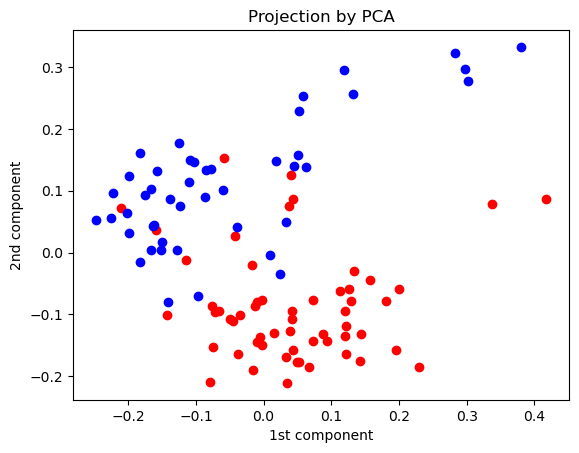

In [68]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_pca[np.array(reds), 0], X_pca[np.array(reds), 1], c="red")
plt.scatter(X_pca[np.array(blues), 0], X_pca[np.array(blues), 1], c="blue")
plt.title("Projection by PCA")
plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.show()

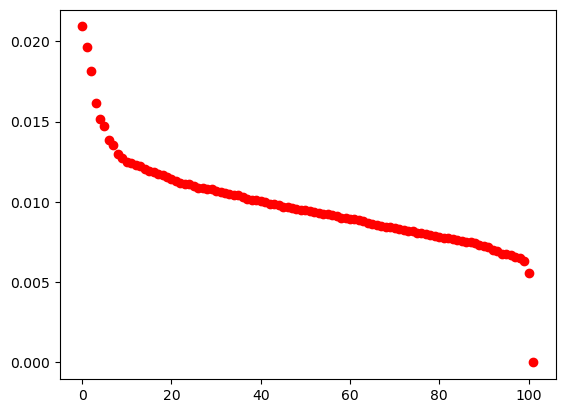

0.1577347802900349


In [72]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()
print(sum(variance_ratio[0:10]))

COMMENT:
Widzimy, że cechy wyjaśniają mniej więcej tyle samo, PCA nie jest tutaj więc niesamowicie efektywne w np. wyborze cech nieistotnych, moglibyśmy odrzucić zaledwie 1 cechę jako nieistotną. Pierwsze 10 cech wyjaśnia 15% wariancji co oznacza, że jest ona rozłożona po wielu cechach.

## EDA Cars

In [75]:
df = pd.read_csv('./04cars-data.csv', header = 0)
data = df.iloc[:,-11:]
array = data.values
array.shape

(387, 11)

In [88]:
features_names = df.columns[-11:]
features_names

Index(['Retail Price', 'Dealer Cost', 'Engine Size (l)', 'Cyl', 'HP',
       'City MPG', 'Hwy MPG', 'Weight', 'Wheel Base', 'Len', 'Width'],
      dtype='object')

In [80]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
normal_array = scaler.fit_transform(array)
np.mean(normal_array[:, 0]), np.std(normal_array[:, 0])

(-4.131062417209885e-17, 1.0)

In [81]:
pca = PCA()
X_pca = pca.fit_transform(normal_array)

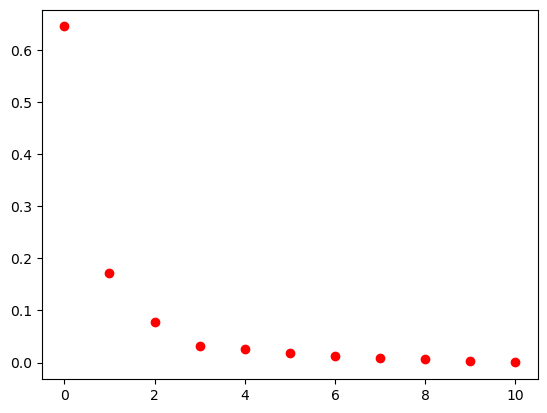

In [83]:
variance_ratio = pca.explained_variance_ratio_
plt.plot(variance_ratio, 'ro')
plt.show()

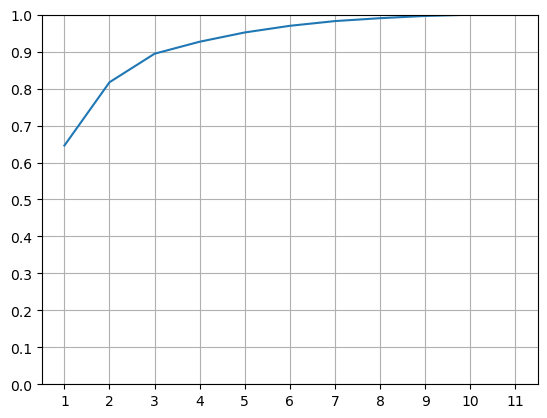

In [105]:
cumsum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 12),cumsum_variance_ratio)
plt.ylim(0, 1)
plt.grid()
plt.xticks(range(1, 12))
plt.yticks(np.linspace(0, 1, 11))
plt.show()

COMMENT:
Widzimy, że już kilka pierwszych principal components wyjaśnia większość wariancji

In [84]:
pca.components_.shape

(11, 11)

In [90]:
first_component = list(zip(features_names, pca.components_[0]))
first_component

[('Retail Price', -0.2637504434440343),
 ('Dealer Cost', -0.2623186387530949),
 ('Engine Size (l)', -0.3470804920252009),
 ('Cyl', -0.33418875762863715),
 ('HP', -0.3186022584840293),
 ('City MPG', 0.3104817267323128),
 ('Hwy MPG', 0.30658863858044433),
 ('Weight', -0.336329366940488),
 ('Wheel Base', -0.2662100335710544),
 ('Len', -0.2567901876706823),
 ('Width', -0.29605459141706114)]

In [91]:
second_component = list(zip(features_names, pca.components_[1]))
second_component

[('Retail Price', 0.46850869750253876),
 ('Dealer Cost', 0.47014658513822577),
 ('Engine Size (l)', -0.015347186463713367),
 ('Cyl', 0.07803201087501883),
 ('HP', 0.29221347613918247),
 ('City MPG', -0.003365935761659622),
 ('Hwy MPG', -0.010964460145349025),
 ('Weight', -0.16746357154787023),
 ('Wheel Base', -0.4181771069592044),
 ('Len', -0.4084113806687549),
 ('Width', -0.31289135016250724)]

W pierwszym komponencie nie widzimy cech bliskich zeru, oznacza to, że jest on jakąś kombinacją wszystkich cech.
W drugim komponencie Engine Size jest bliski zeru, co oznacza, że ten komponent nie 